In [1]:
using PyPlot

INFO: Recompiling stale cache file /home/tehrengruber/.julia/lib/v0.5/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/tehrengruber/.julia/lib/v0.5/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/tehrengruber/.julia/lib/v0.5/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/tehrengruber/.julia/lib/v0.5/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/tehrengruber/.julia/lib/v0.5/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/tehrengruber/.julia/lib/v0.5/Reexport.ji for module Reexport.
INFO: Recompiling stale cache file /home/tehrengruber/.julia/lib/v0.5/LaTeXStrings.ji for module LaTeXStrings.


In [182]:
raw_data = readcsv("../docs/benchmarks/benchmark_multi_core.csv");

In [183]:
for i in 2:size(raw_data, 1)
    row = raw_data[i, :]
    raw_data[i, end] = map(
        (x) -> split(strip(x), ":"),
        split(row[end], ",")
    )
    benchmark_properties = Dict()
    for property in raw_data[i, end]
        benchmark_properties[property[1]] = strip(property[2])
    end
    raw_data[i, end] = benchmark_properties
end

In [184]:
raw_data[2, end]["field_size"]

"1024"

In [185]:
structured_data = Dict()
for i in 2:size(raw_data, 1)
    bench_props = raw_data[i, end]
    
    if (!haskey(structured_data, bench_props["field_size"]))
        structured_data[bench_props["field_size"]] = Any[]
    end
    #push!(data, benchmark_properties["num_threads"], raw_data[i, end-1])
    push!(structured_data[bench_props["field_size"]], bench_props["num_threads"], raw_data[i, 3])
end
for row in structured_data
    structured_data[row[1]] = reshape(structured_data[row[1]], (2, div(length(row[2]), 2)))'
end
structured_data

Dict{Any,Any} with 3 entries:
  "4096" => 7x2 Array{Any,2}:…
  "2048" => 7x2 Array{Any,2}:…
  "1024" => 7x2 Array{Any,2}:…

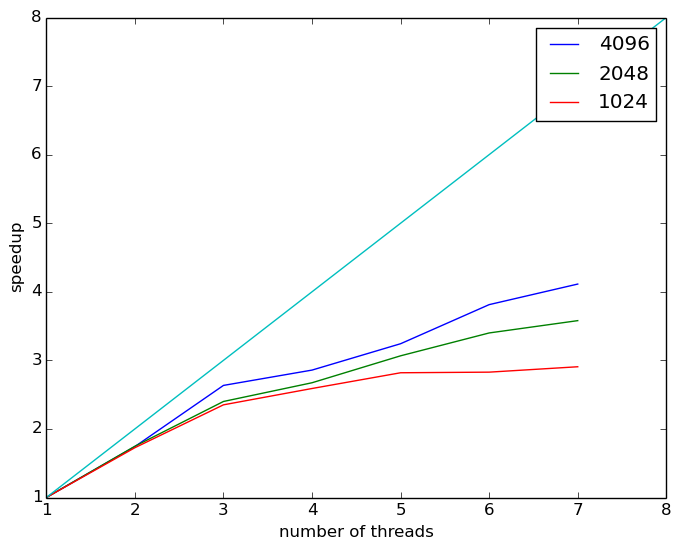

(Any[PyObject <matplotlib.axis.XTick object at 0x7f31b7cac890>,PyObject <matplotlib.axis.XTick object at 0x7f31b7af3c50>,PyObject <matplotlib.axis.XTick object at 0x7f31b7a88d10>,PyObject <matplotlib.axis.XTick object at 0x7f31b7a13d90>,PyObject <matplotlib.axis.XTick object at 0x7f31b7a1c510>,PyObject <matplotlib.axis.XTick object at 0x7f31b7a1cc50>,PyObject <matplotlib.axis.XTick object at 0x7f31b7a273d0>,PyObject <matplotlib.axis.XTick object at 0x7f31b7a27b10>],Any[PyObject <matplotlib.text.Text object at 0x7f31b7a94690>,PyObject <matplotlib.text.Text object at 0x7f31b7ab35d0>,PyObject <matplotlib.text.Text object at 0x7f31b7a13c10>,PyObject <matplotlib.text.Text object at 0x7f31b7a1c390>,PyObject <matplotlib.text.Text object at 0x7f31b7a1cad0>,PyObject <matplotlib.text.Text object at 0x7f31b7a27250>,PyObject <matplotlib.text.Text object at 0x7f31b7a27990>,PyObject <matplotlib.text.Text object at 0x7f31b7a33110>])

In [192]:
for row in structured_data
    field_size = row[1]
    data = row[2]
    
    # get baseline
    baseline = 0
    for i in 1:size(data, 1)
        if data[i, 1] == "1"
            baseline = data[i, 2]
        end
    end
    #println(baseline)
    
    # plot the data
    plot(data[:, 1], baseline./data[:, 2], label=row[1])
end
plot([1:8], [1:8])
legend()
xlabel("number of threads")
ylabel("speedup")
xticks([1:8])

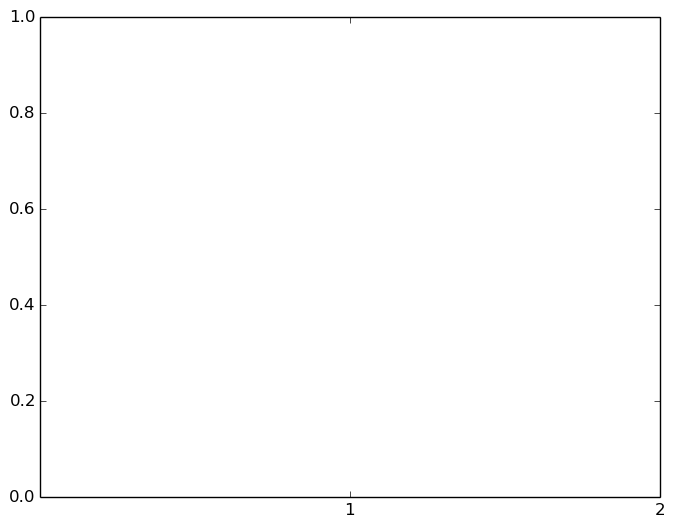

(Any[PyObject <matplotlib.axis.XTick object at 0x7f31b81efe10>,PyObject <matplotlib.axis.XTick object at 0x7f31b81dc490>],Any[PyObject <matplotlib.text.Text object at 0x7f31b815a510>,PyObject <matplotlib.text.Text object at 0x7f31b8167cd0>])

In [179]:
""xticks([1, 2])""

In [ ]:

for row in structured_data
    field_size = row[1]
    data = row[2]
    plot(data[:, 1], data[:, 2], label=row[1])
end
legend()
xlabel("number of threads")
ylabel("time")